In [1]:
# %run 40_Intro_Expt1.ipynb #uncomment if need to work in this file separately

Choose whether to display code or not.
3.6.8
                  Example
----------------  ----------------------------------------------------------------------------------------------
1. Goal Sentence  Sally wants to buy a bottle of wine for her Friday evening dinner.
2. Goal Step      Sally decides to go to the corner-shop near her house.
3. Condition      The shop is (shut/open) and Sally has (an argument/a good chat) with a neighbour walking home.
The waves are stronger than Rebecca expected, she is not the strongest swimmer, so decides to head back inland. Just as she turns around to do so, she notices the lifeguard shouting at her... SHARK


In [37]:
# set up high-res figure downloads
config = {
  'toImageButtonOptions': {
    'format': 'svg', # one of png, svg, jpeg, webp
    'height': None, 'width': None, # download at individually specified sizes
    'scale': 1 # Multiply title/legend/axis/canvas sizes by this factor
  }
}

## Valence

In [2]:
valence_props = master_data.groupby(['means_condition','valence_condition'])['val_code'].value_counts(normalize=True).unstack()
valence_props

val_code                                neg   neither       pos
means_condition valence_condition                              
absent          negative           0.427273  0.077273  0.495455
                positive           0.463636  0.095455  0.440909
present         negative           0.636574  0.106481  0.256944
                positive           0.743182  0.047727  0.209091

In [3]:
master_data.groupby(['means_condition'])['val_code'].value_counts(normalize=True).unstack()


val_code,neg,neither,pos
means_condition,,,
absent,0.445455,0.086364,0.468182
present,0.690367,0.076835,0.232798


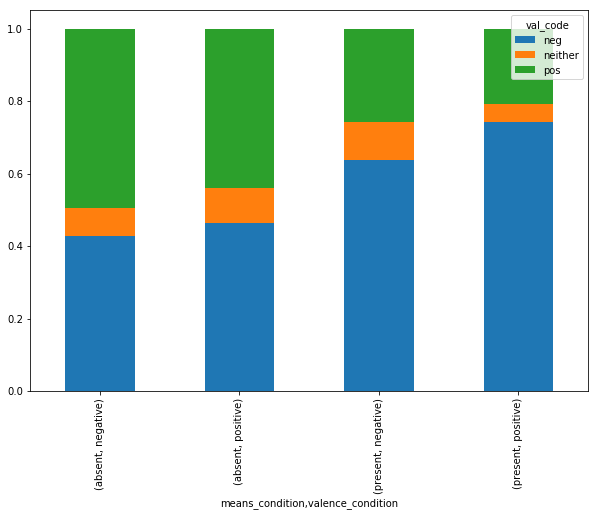

In [4]:
valence_props.plot.bar(stacked=True,figsize=(10,7))

### Chi-Square Valence

In [5]:
valence_chi_df = master_data.groupby(['valence_condition','means_condition'])['val_code'].value_counts().unstack()


#### How many Neithers?

In [6]:
valence_chi_df.sum()/valence_chi_df.sum().sum()

val_code
neg        0.567352
neither    0.081621
pos        0.351027
dtype: float64

8% of responses are neither, so we might drop.

#### Overall Chi-Square

In [7]:
chi_square(valence_chi_df)

Chi square of all conditions:
╒═════════════════════════╤═══════╤═══════════╤═══════╕
│                         │   neg │   neither │   pos │
╞═════════════════════════╪═══════╪═══════════╪═══════╡
│ ('negative', 'absent')  │   188 │        34 │   218 │
├─────────────────────────┼───────┼───────────┼───────┤
│ ('negative', 'present') │   275 │        46 │   111 │
├─────────────────────────┼───────┼───────────┼───────┤
│ ('positive', 'absent')  │   204 │        42 │   194 │
├─────────────────────────┼───────┼───────────┼───────┤
│ ('positive', 'present') │   327 │        21 │    92 │
╘═════════════════════════╧═══════╧═══════════╧═══════╛
Unadjusted Chi-Square
X^2 =  134.20087591941285
degrees of freedom:  6
p =  0.0000000000000000 

William's Corrected Chi-Square
X^2 =  133.69645629566884
degrees of freedom:  6
p =  0.0000000000000000 

Cramer's v effect size =  0.195 



#### Chi-Square by valence

In [8]:
print("Chi-Square Valence")
valence_chi_df_valence = master_data.groupby(['valence_condition'])['val_code'].value_counts().unstack()
val_cond_chi_square(valence_chi_df_valence)

Chi-Square Valence
Chi square of all conditions:
╒═════════════════════╤═══════╤═══════════╤═══════╕
│ valence_condition   │   neg │   neither │   pos │
╞═════════════════════╪═══════╪═══════════╪═══════╡
│ negative            │   463 │        80 │   329 │
├─────────────────────┼───────┼───────────┼───────┤
│ positive            │   531 │        63 │   286 │
╘═════════════════════╧═══════╧═══════════╧═══════╛
Unadjusted Chi-Square
X^2 =  9.643065935035935
degrees of freedom:  2
p =  0.0080544304900317 

William's Corrected Chi-Square
X^2 =  9.62128686553129
degrees of freedom:  2
p =  0.0081426187840492 

Cramer's v effect size =  0.074 



#### Chi-Square by control

In [9]:
print("Chi-Square Control")
valence_chi_df_control = master_data.groupby(['means_condition'])['val_code'].value_counts().unstack()
means_cond_chi_square(valence_chi_df_control)

Chi-Square Control
Chi square of all conditions:
╒═══════════════════╤═══════╤═══════════╤═══════╕
│ means_condition   │   neg │   neither │   pos │
╞═══════════════════╪═══════╪═══════════╪═══════╡
│ absent            │   392 │        76 │   412 │
├───────────────────┼───────┼───────────┼───────┤
│ present           │   602 │        67 │   203 │
╘═══════════════════╧═══════╧═══════════╧═══════╛
Unadjusted Chi-Square
X^2 =  115.92453438765581
degrees of freedom:  2
p =  0.0000000000000000 

William's Corrected Chi-Square
X^2 =  115.6627163612386
degrees of freedom:  2
p =  0.0000000000000000 

Cramer's v effect size =  0.257 



There is an overall significant difference in the frequency of negative, positive, and neither valenced responses to each of the instruction conditions.

#### Pairwise between Experimental conditions.

In [10]:
print("Chi-Square Pairwise Between Experimental Conditions")
cond_chi_square(valence_chi_df)

Chi-Square Pairwise Between Experimental Conditions
('negative', 'absent', 'negative', 'present')
╒═════════════════════════╤═══════╤═══════════╤═══════╕
│                         │   neg │   neither │   pos │
╞═════════════════════════╪═══════╪═══════════╪═══════╡
│ ('negative', 'absent')  │   188 │        34 │   218 │
├─────────────────────────┼───────┼───────────┼───────┤
│ ('negative', 'present') │   275 │        46 │   111 │
╘═════════════════════════╧═══════╧═══════════╧═══════╛
Unadjusted Chi-Square
X^2 =  52.87818043393222
degrees of freedom:  2
p =  0.0000000000032934 

William's Corrected Chi-Square
X^2 =  52.66024063498767
degrees of freedom:  2
p =  0.0000000000036726 

Cramer's v effect size =  0.246 



('negative', 'absent', 'positive', 'absent')
╒════════════════════════╤═══════╤═══════════╤═══════╕
│                        │   neg │   neither │   pos │
╞════════════════════════╪═══════╪═══════════╪═══════╡
│ ('negative', 'absent') │   188 │        34 │   218 │
├───────

#### By-materials Valence Chi-Square

In [11]:
print("Chi-Square Overall, by Material")
materialsXvariable_valence = master_data.groupby(['material','valence_condition','means_condition'])['val_code'].value_counts().unstack()
materialsXvariable_valence = materialsXvariable_valence[['neg','pos']]
mat_chi_square(materialsXvariable_valence, .05)

Chi-Square Overall, by Material
john_party
╒═════════════════════════╤═══════╤═══════╕
│                         │   neg │   pos │
╞═════════════════════════╪═══════╪═══════╡
│ ('negative', 'absent')  │    38 │    13 │
├─────────────────────────┼───────┼───────┤
│ ('negative', 'present') │    39 │    10 │
├─────────────────────────┼───────┼───────┤
│ ('positive', 'absent')  │    37 │    12 │
├─────────────────────────┼───────┼───────┤
│ ('positive', 'present') │    48 │     4 │
╘═════════════════════════╧═══════╧═══════╛
Unadjusted Chi-Square
X^2 =  6.611014600887473
degrees of freedom:  3
p =  0.0853856892060304 

William's Corrected Chi-Square
X^2 =  6.466289434191756
degrees of freedom:  3
p =  0.0910014880589177 

Cramer's v effect size =  0.179 



bill_holiday
╒═════════════════════════╤═══════╤═══════╕
│                         │   neg │   pos │
╞═════════════════════════╪═══════╪═══════╡
│ ('negative', 'absent')  │    18 │    35 │
├─────────────────────────┼───────┼───────┤
│ (

In [12]:
print("Chi-Square Valence, by Material")
materialsXvariable_valence_valence = master_data.groupby(['material','valence_condition'])['val_code'].value_counts().unstack()
materialsXvariable_valence_valence = materialsXvariable_valence_valence[['neg','pos']]
mat_chi_square(materialsXvariable_valence_valence, .05)

Chi-Square Valence, by Material
john_party
╒═════════════════════╤═══════╤═══════╕
│ valence_condition   │   neg │   pos │
╞═════════════════════╪═══════╪═══════╡
│ negative            │    77 │    23 │
├─────────────────────┼───────┼───────┤
│ positive            │    85 │    16 │
╘═════════════════════╧═══════╧═══════╛
Unadjusted Chi-Square
X^2 =  1.2206011466531261
degrees of freedom:  1
p =  0.2692427090092857 

William's Corrected Chi-Square
X^2 =  1.204437816068502
degrees of freedom:  1
p =  0.2724365025773177 

Cramer's v effect size =  0.077 



bill_holiday
╒═════════════════════╤═══════╤═══════╕
│ valence_condition   │   neg │   pos │
╞═════════════════════╪═══════╪═══════╡
│ negative            │    47 │    54 │
├─────────────────────┼───────┼───────┤
│ positive            │    64 │    38 │
╘═════════════════════╧═══════╧═══════╛
Unadjusted Chi-Square
X^2 =  4.747147568708966
degrees of freedom:  1
p =  0.0293469019872808 

William's Corrected Chi-Square
X^2 =  4.7119190247

In [13]:
print("Chi-Square Control, by Material")
materialsXvariable_valence_control = master_data.groupby(['material','means_condition'])['val_code'].value_counts().unstack()
materialsXvariable_valence_control = materialsXvariable_valence_control[['neg','pos']]
mat_chi_square(materialsXvariable_valence_control, .01)

Chi-Square Control, by Material
john_party
╒═══════════════════╤═══════╤═══════╕
│ means_condition   │   neg │   pos │
╞═══════════════════╪═══════╪═══════╡
│ absent            │    75 │    25 │
├───────────────────┼───────┼───────┤
│ present           │    87 │    14 │
╘═══════════════════╧═══════╧═══════╛
Unadjusted Chi-Square
X^2 =  3.3061228526698816
degrees of freedom:  1
p =  0.0690221590251109 

William's Corrected Chi-Square
X^2 =  3.2623428211930885
degrees of freedom:  1
p =  0.0708877800590919 

Cramer's v effect size =  0.127 



bill_holiday
╒═══════════════════╤═══════╤═══════╕
│ means_condition   │   neg │   pos │
╞═══════════════════╪═══════╪═══════╡
│ absent            │    40 │    62 │
├───────────────────┼───────┼───────┤
│ present           │    71 │    30 │
╘═══════════════════╧═══════╧═══════╛
Unadjusted Chi-Square
X^2 =  18.54928430066516
degrees of freedom:  1
p =  0.0000165567382696 

William's Corrected Chi-Square
X^2 =  18.4116302108454
degrees of freedom:  1

### Valence Log-Odds

In [14]:
print("neg_log_odds tell us how many times more likely it is to get a negative vs. positive response.")

neg_log_odds tell us how many times more likely it is to get a negative vs. positive response.


In [15]:
#get proportions
valence_props['neg_odds'] = valence_props['neg']/(1-valence_props['neg']) # lumps pos and neither together... essentially the odds of getting neg over not getting neg
valence_props['neg_log_odds'] = np.log(valence_props['neg_odds']) 
valence_props

val_code                                neg   neither       pos  neg_odds  \
means_condition valence_condition                                           
absent          negative           0.427273  0.077273  0.495455  0.746032   
                positive           0.463636  0.095455  0.440909  0.864407   
present         negative           0.636574  0.106481  0.256944  1.751592   
                positive           0.743182  0.047727  0.209091  2.893805   

val_code                           neg_log_odds  
means_condition valence_condition                
absent          negative              -0.292987  
                positive              -0.145712  
present         negative               0.560525  
                positive               1.062572

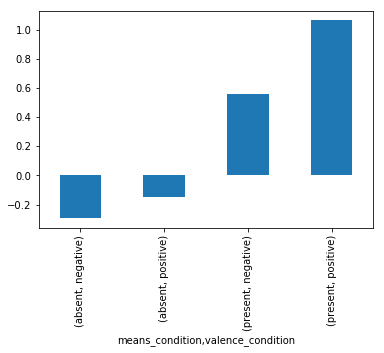

In [16]:
valence_props['neg_log_odds'].plot.bar()

In [17]:
valence_props2 = master_data.groupby(['means_condition'])['val_code'].value_counts(normalize=True).unstack()

valence_props2['neg_odds'] = valence_props2['neg']/(1-valence_props2['neg']) # lumps pos and neither together... essentially the odds of getting neg over not getting neg
valence_props2['neg_log_odds'] = np.log(valence_props2['neg_odds']) 
valence_props2

val_code,neg,neither,pos,neg_odds,neg_log_odds
means_condition,,,,,
absent,0.445455,0.086364,0.468182,0.803279,-0.219054
present,0.690367,0.076835,0.232798,2.229630,0.801835


In [18]:
for row in valence_props2.iterrows():
    print(row[0], row[1][4])
    lo = Export.value(row[0] + "logoddsneg", "{:.3f}".format(row[1][4])) 
    lo > latex_report

absent -0.21905356606268478
present 0.8018354863104464


In [19]:
print("Negative vs positive uncontrollable log odds of a negative outcome.")
np.log(valence_props.loc['absent','negative']['neg_odds']/valence_props.loc['absent','positive']['neg_odds'])

Negative vs positive uncontrollable log odds of a negative outcome.


-0.14727531350008047

In [20]:
print("Negative vs positive controllable log odds of a negative outcome.")
np.log(valence_props.loc['present','negative']['neg_odds']/valence_props.loc['present','positive']['neg_odds'])

Negative vs positive controllable log odds of a negative outcome.


-0.5020470598666495

In [21]:
print("Uncontrollable vs controllable negative log odds of a negative outcome.")
np.log(valence_props.loc['absent','negative']['neg_odds']/valence_props.loc['present','negative']['neg_odds'])

Uncontrollable vs controllable negative log odds of a negative outcome.


-0.8535124169997375

In [22]:
print("Uncontrollable vs controllable positive log odds of a negative outcome.")
np.log(valence_props.loc['absent','positive']['neg_odds']/valence_props.loc['present','positive']['neg_odds'])

Uncontrollable vs controllable positive log odds of a negative outcome.


-1.2082841633663064

### Valence Conclusion:

In [38]:
valence_props_plotly = valence_props.reset_index()

x_cats = valence_props_plotly['means_condition'],valence_props_plotly['valence_condition']
valence_fig = go.Figure(data=[
    go.Bar(name='Negative Outcome', 
           x=[['Uncontrollable', 'Uncontrollable', 'Controllable', 'Controllable'],
              ["Negative", "Positive", "Negative", "Positive"]], 
           y=valence_props_plotly['neg'],
           text=valence_props_plotly['neg'], 
           marker_color='#EF553B'),
    go.Bar(name='Positive Outcome', 
           x=[['Uncontrollable', 'Uncontrollable', 'Controllable', 'Controllable'],
              ["Negative", "Positive", "Negative", "Positive"]], 
           y=valence_props_plotly['pos'],
           text=valence_props_plotly['pos'], 
           marker_color='#00CC96'),
#     go.Bar(name='Neither', 
#            x=[['Uncontrollable', 'Uncontrollable', 'Controllable', 'Controllable'],
#               ["Negative", "Positive", "Negative", "Positive"]], 
#            y=valence_props_plotly['neither'], marker_color='#FECB52')
])


###add sig brackets 
###Horrifying

## between pos and neg controllable
# Top line
valence_fig.add_shape(type="line",
    xref="paper", yref="paper",
    x0=0.628, y0=0.87,
    x1=0.882, y1=0.87,
    line=dict(
        color="black",
        width=2,
    ),
             )
# Left line
valence_fig.add_shape(type="line",
    xref="paper", yref="paper",
    x0=0.63, y0=0.82,
    x1=0.63, y1=0.87,
    line=dict(
        color="black",
        width=2,
    ),
             )
# Right line
valence_fig.add_shape(type="line",
    xref="paper", yref="paper",
    x0=0.88, y0=0.82,
    x1=0.88, y1=0.87,
    line=dict(
        color="black",
        width=2,
    ),
             )
valence_fig.add_annotation(text="***",
                           xref="x domain", yref="y",
                           x=0.755, y=0.88,
                           xanchor='center', yanchor='middle',
                           align="center",
                           showarrow=False,
                          font=dict(
                                family="Times New Roman",
                                size=18,
                                color="black"
                                )
                          )


##between controllable and uncontrollable positive
# Top line
valence_fig.add_shape(type="line",
    xref="paper", yref="paper",
    x0=0.378, y0=0.95,
    x1=0.882, y1=0.95,
    line=dict(
        color="black",
        width=2,
    ),
             )
# Left line
valence_fig.add_shape(type="line",
    xref="paper", yref="paper",
    x0=0.38, y0=0.9,
    x1=0.38, y1=0.95,
    line=dict(
        color="black",
        width=2,
    ),
             )
# Right line
valence_fig.add_shape(type="line",
    xref="paper", yref="paper",
    x0=0.88, y0=0.9,
    x1=0.88, y1=0.95,
    line=dict(
        color="black",
        width=2,
    ),
             )
valence_fig.add_annotation(text="***",
                           xref="x domain", yref="y",
                           x=0.63, y=0.96,
                           xanchor='center', yanchor='middle',
                           align="center",
                           showarrow=False,
                          font=dict(
                                family="Times New Roman",
                                size=18,
                                color="black"
                                )
                          )


##between controllable and uncontrollable negative
# Top line
valence_fig.add_shape(type="line",
    xref="paper", yref="paper",
    x0=0.118, y0=0.77,
    x1=0.632, y1=0.77,
    line=dict(
        color="black",
        width=2,
    ),
             )
# Left line
valence_fig.add_shape(type="line",
    xref="paper", yref="paper",
    x0=0.63, y0=0.77,
    x1=0.63, y1=0.72,
    line=dict(
        color="black",
        width=2,
    ),
             )
# Right line
valence_fig.add_shape(type="line",
    xref="paper", yref="paper",
    x0=0.12, y0=0.77,
    x1=0.12, y1=0.72,
    line=dict(
        color="black",
        width=2,
    ),
             )
valence_fig.add_annotation(text="***",
                           xref="x domain", yref="y",
                           x=0.375, y=0.78,
                           xanchor='center', yanchor='middle',
                           align="center",
                           showarrow=False,
                          font=dict(
                                family="Times New Roman",
                                size=18,
                                color="black"
                                )
                          )


valence_fig.update_layout(#barmode='stack', 
                          template = 'none', 
#                           legend_title="Valence Rating",
                          font_family="Times New Roman", font_size=12,
                          width = 600, height = 350,
                          #remove some margin so the graph fits nicer in latex
                          margin_l=50, #left margin
                          margin_r=0, #right margin
                          margin_b=60, #bottom margin
                          margin_t=10, #top margin
                        legend=dict(
#                             orientation="h",
                            yanchor="top",
                            y=1.05,
                            xanchor="left",
                            x=0.05,
                           bordercolor='grey',
                           borderwidth=1
                        )
                         )


#axis titles
valence_fig.update_xaxes(title_text='Controllability and Valence Condition Group')
valence_fig.update_yaxes(title_text='Proportion of Outcome Responses', 
                         range=(0,1),
                        tickformat= ',.0%',)

valence_fig.update_traces(texttemplate='%{text:.2%}',
                          textposition='outside'
                         )


valence_fig.show(config=config)

In [24]:
#save the figure
valence_chart = Export.figure(
    'ValenceMain',  # Export name
    image=valence_fig,             # The plot to be exported
    data=valence_props[['neg','pos','neither']],     # The data used to produce the plot.
    text_width=0.9, #fig width relative to textwidth=1
    caption='Valence of unexpected  events, reported as negative and positive outcomes, in the four conditions of the study. *** p $\leq$ 0.001'
) 

valence_chart > latex_report;

Could not generate 3_output//control_report/_kallysto/figs/4_Experiment1_Analysis.ipynb//ValenceMain.pdf. Missing savefig.


In [25]:
for mat in materials:
    mat_valence_props_plotly = master_data[master_data['material']==mat].groupby(['means_condition','valence_condition'])['val_code'].value_counts(normalize=True).unstack().reset_index()

    x_cats = mat_valence_props_plotly['means_condition'],mat_valence_props_plotly['valence_condition']
    mat_valence_fig = go.Figure(data=[
        go.Bar(name='Negative', 
               x=[['Uncontrollable', 'Uncontrollable', 'Controllable', 'Controllable'],
                  ["Negative", "Positive", "Negative", "Positive"]], 
               y=mat_valence_props_plotly['neg'],
               text=mat_valence_props_plotly['neg'], 
               marker_color='#EF553B'),
        go.Bar(name='Positive', 
               x=[['Uncontrollable', 'Uncontrollable', 'Controllable', 'Controllable'],
                  ["Negative", "Positive", "Negative", "Positive"]], 
               y=mat_valence_props_plotly['pos'],
               text=mat_valence_props_plotly['pos'], 
               marker_color='#00CC96'),
    #     go.Bar(name='Neither', 
    #            x=[['Uncontrollable', 'Uncontrollable', 'Controllable', 'Controllable'],
    #               ["Negative", "Positive", "Negative", "Positive"]], 
    #            y=valence_props_plotly['neither'], marker_color='#FECB52')
    ])


    mat_valence_fig.update_layout(#barmode='stack', 
                              template = 'none', 
                              legend_title="Valence Rating",
                              font_family="Times New Roman", font_size=12,
                              width = 500, height = 350,
                              #remove some margin so the graph fits nicer in latex
                              margin_l=50, #left margin
                              margin_r=0, #right margin
                              margin_b=60, #bottom margin
                              margin_t=10, #top margin
                            legend=dict(
                                orientation="h",
                                yanchor="bottom",
                                y=0.99,
                                xanchor="left",
                                x=0.2
                            )
                             )


    #axis titles
    mat_valence_fig.update_xaxes(title_text='Controllability and Valence Condition Group')
    mat_valence_fig.update_yaxes(title_text='Proportion of Outcome Responses', 
                             range=(0,1),
                            tickformat= ',.0%',)

    mat_valence_fig.update_traces(texttemplate='%{text:.2%}',
                              textposition='outside'
                             )

    print(mat)
    mat_valence_fig.show()

john_party


bill_holiday


rebecca_swimming


sally_wine


belinda_meeting


michael_breakfast


lucy_loan


sean_call


In [26]:
valence_chi_df

val_code                           neg  neither  pos
valence_condition means_condition                   
negative          absent           188       34  218
                  present          275       46  111
positive          absent           204       42  194
                  present          327       21   92

#### Chi-Square
There is an overall significant difference in the frequencies of positive and negative outcomes, this is matched by 7 materials

Unlike the controllability ratings, the valence ratings do show a difference between the means conditions, such that means-absent conditions lead to more positively-valenced responses.

There is a significant difference between the negative-absent and negative-present conditions, such that there are fewer negative responses and more positive responses in the means-absent condition (p < .001).
There is a significant difference between the positive-absent and positive-present conditions, such that there are fewer negative and more positive responses in the means-absent condition (p < .001).

There is _no_ significant difference between the negative-absent and positive-absent conditions.
However, there is a significant difference between the negative-present and positive-present conditions, such that there are fewer negative and more positive responses in the negative condition (p < .001).

There is a significant difference between the negative-absent and positive-present conditions, such that there are fewer negative responses and more positive responses in the negative-absent condition (p < .001).
There is a significant difference between the negative-present and positive-absent conditions, such that there are fewer negative responses and more positive responses in the positive-absent condition (p < .001).

### Log-Odds of a Negative Response by Material by Condition

In [27]:
val_odds_ratio_data = master_data.copy(deep=True)
val_odds_ratio_data = val_odds_ratio_data.groupby(['material','valence_condition','means_condition'])['val_code'].value_counts(normalize=True).unstack()
#val_odds_ratio_data.head()

In [28]:
val_odds_ratio_data['neg_odds'] = val_odds_ratio_data['neg']/(1-val_odds_ratio_data['neg'])
val_odds_ratio_data['neg_log_odds'] = np.log(val_odds_ratio_data['neg_odds']) 
#val_odds_ratio_data

In [29]:
val_log_odds_plot_data = pd.DataFrame(val_odds_ratio_data['neg_log_odds']).reset_index()
val_log_odds_plot_data.head()

,material,valence_condition,means_condition,neg_log_odds
0,belinda_meeting,negative,absent,-0.109199
1,belinda_meeting,negative,present,0.000000
2,belinda_meeting,positive,absent,0.405465
3,belinda_meeting,positive,present,0.980829
4,bill_holiday,negative,absent,-0.720546


In [30]:
colors = ['rgb(228,26,28)','rgb(179,222,105)','rgb(251,180,174)','rgb(77,175,74)']

log_odds_subplot_colors = {}
for idx, tup in enumerate(zipped_cond_pairs):
    log_odds_subplot_colors[tup] = colors[idx]
    
log_odds_subplot_colors

{('negative', 'absent'): 'rgb(228,26,28)',
 ('positive', 'absent'): 'rgb(179,222,105)',
 ('negative', 'present'): 'rgb(251,180,174)',
 ('positive', 'present'): 'rgb(77,175,74)'}

In [31]:
# Create traces
neg_log_odds_valence_cond_fig = go.Figure()

for val, means in zip(['negative','negative','positive','positive'],['absent','present','absent','present']):
    #get data for that condition pair
    data = val_log_odds_plot_data[(val_log_odds_plot_data['valence_condition']==val)&(val_log_odds_plot_data['means_condition']==means)]
    #add the markers for that condition pair
    neg_log_odds_valence_cond_fig.add_trace(go.Scatter(x=data['material'], y=data['neg_log_odds'],
                        mode='markers', 
                        marker_size=8, 
                        marker_color=log_odds_subplot_colors[(val,means)],
                        name=str(val + " means " + means).title()))


neg_log_odds_valence_cond_fig.update_layout(
    #title="Log Odds of a Negative Response to Each Material in Each Condition",
    xaxis_title="Material",
    yaxis_title="Log Odds of a Negative Response",
    legend_title="Material Condition",
    template='none', 
    font_family="Times New Roman", font_size=12,
    width = 500, height = 400,
    #remove some margin so the graph fits nicer in latex
    margin_l=40, #left margin
    margin_r=0, #right margin
    margin_b=75, #bottom margin
    margin_t=0, #top margin
    
    legend=dict(
        title="Material Condition    ",
        orientation="h",
#         yanchor="bottom",
        y=-.50,
#         xanchor="left",
#         x=0.025,
        font = dict(
            family = "Times New Roman", 
            size = 12, 
            color = "black"),
        ),
    
)

neg_log_odds_valence_cond_fig.update_xaxes(categoryorder='total ascending',
                                           tickangle = -45,)

neg_log_odds_valence_cond_fig.show()

In [32]:
val_odds_ratio_data = master_data.copy(deep=True)
val_odds_ratio_data = val_odds_ratio_data.groupby(['material','means_condition'])['val_code'].value_counts(normalize=True).unstack()
#val_odds_ratio_data.head()

In [33]:
val_odds_ratio_data['neg_odds'] = val_odds_ratio_data['neg']/(1-val_odds_ratio_data['neg'])
val_odds_ratio_data['neg_log_odds'] = np.log(val_odds_ratio_data['neg_odds']) 
#val_odds_ratio_data

In [34]:
val_log_odds_plot_data = pd.DataFrame(val_odds_ratio_data['neg_log_odds']).reset_index()
val_log_odds_plot_data.head()

,material,means_condition,neg_log_odds
0,belinda_meeting,absent,0.145712
1,belinda_meeting,present,0.467023
2,bill_holiday,absent,-0.559616
3,bill_holiday,present,0.625094
4,john_party,absent,0.762140


# Log Odds of a Negative Response given Controllable or Uncontrollable material scenarios.

In [39]:
# Create traces
neg_log_odds_valence_cond_fig = go.Figure()

neg_log_odds_colors = {'absent':'rgb(251,180,174)',
                       'present':'rgb(228,26,28)'}

for means in ['absent','present']:
    #get data for that condition pair
    data = val_log_odds_plot_data[(val_log_odds_plot_data['means_condition']==means)]
    #add the markers for that condition pair
    neg_log_odds_valence_cond_fig.add_trace(go.Scatter(x=data['material'], y=data['neg_log_odds'],
                        mode='markers', 
                        marker_size=8,
                        marker_color=neg_log_odds_colors[means],
                        name=str(condition_titles[means]).title() + " Scenario")
                                           )


neg_log_odds_valence_cond_fig.update_layout(
    #title="Log Odds of a Negative Response to Each Material in Each Condition",
    xaxis_title="Material",
    yaxis_title="Log Odds of a Negative Response",
#     legend_title="Scenario Controllability",
    template='none', 
    font_family="Times New Roman", font_size=12,
    width = 600, height = 350,
    #remove some margin so the graph fits nicer in latex
    margin_l=50, #left margin
    margin_r=50, #right margin
    margin_b=75, #bottom margin
    margin_t=0, #top margin
    
    legend=dict(
#         title="Scenario Controllability    ",
#         orientation="h",
        yanchor="top",
                            y=1.05,
                            xanchor="left",
                            x=0.05,
                           bordercolor='grey',
                           borderwidth=1,
        font = dict(
            family = "Times New Roman", 
            size = 12, 
            color = "black"),
        ),
    
)

neg_log_odds_valence_cond_fig.update_yaxes(range=[-2.2, 2.2])

# neg_log_odds_valence_cond_fig.add_annotation(
#     showarrow=False,
#     text="More likely to be positive.",
#     xref="paper", yref="paper",
#     x=0, y=-.17
# )
# neg_log_odds_valence_cond_fig.add_annotation(
#     showarrow=False,
#     text="More likely to be negative.",
#     xref="paper", yref="paper",
#     x=1, y=-.17
# )

neg_log_odds_valence_cond_fig.update_xaxes(categoryorder='total ascending',)

neg_log_odds_valence_cond_fig.show(config=config)

Ok, so in all but one case, the two present conditions (red and orange) are both above the two absent conditions, meaning they are more likely to have negative responses. 
In all but one and a half cases, the negative conditions (blue and orange) are below their corresponding positive conditions, meaning they are less likely to have negative responses.

In [36]:
#save the figure
neglogodds_by_mat_chart = Export.figure(
    'NegLogOddsValenceMaterialsChart',  # Export name
    image=neg_log_odds_valence_cond_fig,             # The plot to be exported
    data=val_log_odds_plot_data, # The data used to produce the plot.
    text_width=1,
    caption='Log odds of reporting a negative outcome (i.e., the negativity index) for the uncontrollable and controllable versions of each material-scenario in the study.'
) 

neglogodds_by_mat_chart > latex_report;

Could not generate 3_output//control_report/_kallysto/figs/4_Experiment1_Analysis.ipynb//NegLogOddsValenceMaterialsChart.pdf. Missing savefig.
